## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## Functions

In [2]:
def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index(drop=True)
    return df

In [3]:
def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df


## EDA

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.price.max(), df.price.min(), df.price.mean(), df.price.std()

(30750000.0, 27360.0, 1108535.837871, 896385.6591926552)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### Drop Outliers (+- 1.5x Interquartile Range)

In [8]:
df = drop_outliers(df, 'sqft_living').reset_index(drop=True)
df = drop_outliers(df, 'lat').reset_index(drop=True)
df = drop_outliers(df, 'long').reset_index(drop=True)
df = drop_outliers(df, 'price').reset_index(drop=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.644800e+04,2.644800e+04,26448.000000,26448.000000,26448.000000,2.644800e+04,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000
mean,4.573990e+09,9.351912e+05,3.368232,2.224686,1974.694722,1.533174e+04,1.489394,1694.948994,455.235632,315.399009,196.672754,1972.578910,84.517733,47.538115,-122.226111
std,2.872331e+09,4.291522e+05,0.944539,0.784825,757.739880,5.288984e+04,0.546934,712.103736,541.989620,268.232397,221.044850,31.396284,402.133419,0.150044,0.129056
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.000860,-122.526650
25%,2.144800e+09,6.250000e+05,3.000000,2.000000,1400.000000,4.900000e+03,1.000000,1160.000000,0.000000,0.000000,30.000000,1951.000000,0.000000,47.406360,-122.333720
50%,3.888100e+09,8.256500e+05,3.000000,2.500000,1870.000000,7.363000e+03,1.000000,1510.000000,0.000000,380.000000,130.000000,1974.000000,0.000000,47.550050,-122.257115
75%,7.298013e+09,1.190000e+06,4.000000,2.500000,2450.000000,1.013625e+04,2.000000,2110.000000,920.000000,500.000000,290.000000,1999.000000,0.000000,47.673410,-122.139277
max,9.904000e+09,2.230000e+06,11.000000,7.500000,4410.000000,3.067495e+06,4.000000,5500.000000,3560.000000,2840.000000,2880.000000,2022.000000,2022.000000,47.876700,-121.829060


### Finding & Dropping Nulls

In [9]:
df.isnull().sum().sum()

28

In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df.isnull().sum().sum()

0

### Dropping Undesired Columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26420 non-null  int64  
 1   date           26420 non-null  object 
 2   price          26420 non-null  float64
 3   bedrooms       26420 non-null  int64  
 4   bathrooms      26420 non-null  float64
 5   sqft_living    26420 non-null  int64  
 6   sqft_lot       26420 non-null  int64  
 7   floors         26420 non-null  float64
 8   waterfront     26420 non-null  object 
 9   greenbelt      26420 non-null  object 
 10  nuisance       26420 non-null  object 
 11  view           26420 non-null  object 
 12  condition      26420 non-null  object 
 13  grade          26420 non-null  object 
 14  heat_source    26420 non-null  object 
 15  sewer_system   26420 non-null  object 
 16  sqft_above     26420 non-null  int64  
 17  sqft_basement  26420 non-null  int64  
 18  sqft_g

In [13]:
df = df.drop(['view', 
              'sqft_above',
              'sqft_basement', 
              'yr_renovated', 
              'id'
             ], axis=1)

### Extract zide codes from address to use as possible feature

In [14]:
df['zipcode'] = df.address.str[-20:-15]
df['zipcode'].value_counts()

98042    985
98038    853
98103    740
98117    731
98115    719
        ... 
98039      2
98422      1
98387      1
98296      1
98050      1
Name: zipcode, Length: 79, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          26420 non-null  object 
 1   price         26420 non-null  float64
 2   bedrooms      26420 non-null  int64  
 3   bathrooms     26420 non-null  float64
 4   sqft_living   26420 non-null  int64  
 5   sqft_lot      26420 non-null  int64  
 6   floors        26420 non-null  float64
 7   waterfront    26420 non-null  object 
 8   greenbelt     26420 non-null  object 
 9   nuisance      26420 non-null  object 
 10  condition     26420 non-null  object 
 11  grade         26420 non-null  object 
 12  heat_source   26420 non-null  object 
 13  sewer_system  26420 non-null  object 
 14  sqft_garage   26420 non-null  int64  
 15  sqft_patio    26420 non-null  int64  
 16  yr_built      26420 non-null  int64  
 17  address       26420 non-null  object 
 18  lat           26420 non-nu

### Add feature for age when sold

In [16]:
df['date'].value_counts()
df['date_year'] = df['date'].apply(pd.to_datetime)
df['date_year'] = df['date_year'].dt.year
df['date_year']

df['age_when_sold'] = df['date_year'] - df['yr_built']
df['age_when_sold']

0         53
1         71
2         65
3         11
4          9
        ... 
26415    100
26416     10
26417     27
26418     16
26419     57
Name: age_when_sold, Length: 26420, dtype: int64

In [17]:
df['yr_built'].value_counts()

2021    1129
1968     482
1967     451
1978     450
1977     450
        ... 
1901      36
1935      35
1934      34
1902      31
1933      29
Name: yr_built, Length: 123, dtype: int64

In [18]:
# df[['date', 'yr_built']] = df[['date', 'yr_built']].apply(pd.to_datetime)
# df['age_when_sold'] = ((df['date'] - df['yr_built']).dt.days)/365
# df['age_when_sold'].value_counts()
# # df['yr_built'].value_counts()

In [19]:
# df['year_sold'] = df['date'].dt.year
# df['year_sold'].value_counts()
# len(df)

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,date_year,age_when_sold
count,2.642000e+04,26420.000000,26420.000000,26420.000000,2.642000e+04,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000
mean,9.354395e+05,3.369531,2.225360,1975.344928,1.524770e+04,1.489421,315.607419,196.662983,1972.573051,47.538172,-122.226127,2021.354996,48.781945
std,4.291241e+05,0.943124,0.784123,757.302280,5.227460e+04,0.547000,268.206900,220.967477,31.388103,0.150008,0.128973,0.478521,31.406812
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000,47.000860,-122.526650,2021.000000,-1.000000
25%,6.250000e+05,3.000000,2.000000,1400.000000,4.900000e+03,1.000000,0.000000,30.000000,1951.000000,47.406434,-122.333679,2021.000000,22.000000
50%,8.260000e+05,3.000000,2.500000,1870.000000,7.360000e+03,1.000000,380.000000,130.000000,1974.000000,47.550115,-122.257115,2021.000000,47.000000
75%,1.190470e+06,4.000000,2.500000,2450.000000,1.013200e+04,2.000000,500.000000,290.000000,1999.000000,47.673411,-122.139277,2022.000000,70.000000
max,2.230000e+06,11.000000,7.500000,4410.000000,3.067495e+06,4.000000,2840.000000,2880.000000,2022.000000,47.876700,-121.829060,2022.000000,122.000000


In [21]:
df.age_when_sold.describe()

count    26420.000000
mean        48.781945
std         31.406812
min         -1.000000
25%         22.000000
50%         47.000000
75%         70.000000
max        122.000000
Name: age_when_sold, dtype: float64

In [23]:
df.price.describe()

count    2.642000e+04
mean     9.354395e+05
std      4.291241e+05
min      2.736000e+04
25%      6.250000e+05
50%      8.260000e+05
75%      1.190470e+06
max      2.230000e+06
Name: price, dtype: float64

Find the most correlated column to price

In [20]:
df.corr()['price'].sort_values()

age_when_sold   -0.073991
sqft_lot         0.060780
yr_built         0.075396
date_year        0.089280
long             0.145425
floors           0.209825
sqft_garage      0.216967
sqft_patio       0.233824
bedrooms         0.299602
bathrooms        0.418828
lat              0.440139
sqft_living      0.547406
price            1.000000
Name: price, dtype: float64

### EDA Visualizations

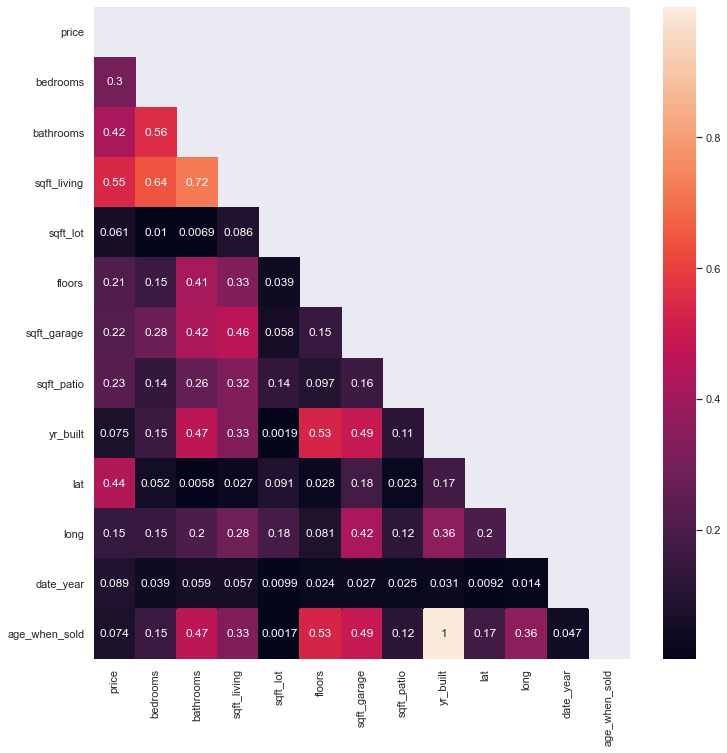

In [21]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df.corr()))
sns.heatmap(abs(df.corr()), annot=True, mask=mask);

In [22]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

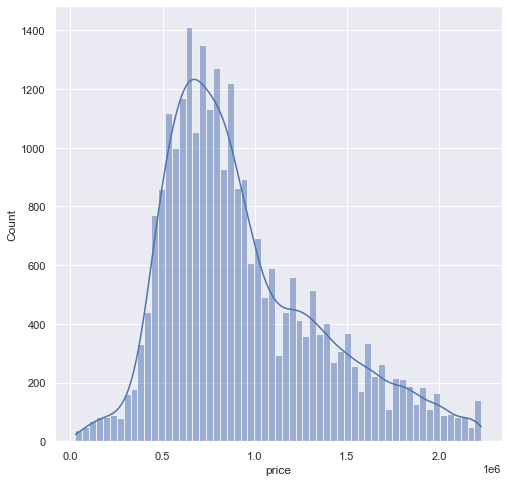

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

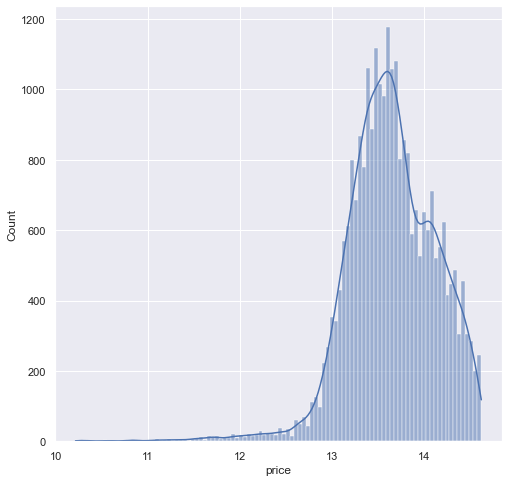

In [24]:
#logscaling target
fig, ax = plt.subplots(figsize=(8,8))
y2 = np.log(df.price)
sns.histplot(y2, kde=True)

### EDA - Baseline OLS Model

In [25]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y = df['price']
model = sm.OLS(y, x).fit()
model.rsquared

0.3033787884100603

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     3835.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:13   Log-Likelihood:            -3.7537e+05
No. Observations:               26420   AIC:                         7.507e+05
Df Residuals:                   26416   BIC:                         7.508e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.212e+05   6158.583     52.150      0.000    3.09e+05    3.33e+05
sqft_living   298.3032      3.077     96.946      0.000     292.272     304.334
sqft_lot        0.0567      0.043      1.330      0.183      -0.027       0.140
sqft_patio    122.8036     10.605     11.580      0.000     102.017     143.590
==============================================================================
Omnibus:                     1260.728   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.723
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       3.518   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS Model

In [27]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.2552250673702846

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3017.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:13   Log-Likelihood:                -14547.
No. Observations:               26420   AIC:                         2.910e+04
Df Residuals:                   26416   BIC:                         2.914e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0027      0.007   1801.914      0.000      12.989      13.017
sqft_living     0.0003   3.61e-06     85.852      0.000       0.000       0.000
sqft_lot    -1.491e-08   4.99e-08     -0.299      0.765   -1.13e-07    8.29e-08
sqft_patio      0.0001   1.24e-05     10.947      0.000       0.000       0.000
==============================================================================
Omnibus:                     7865.705   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50024.140
Skew:                          -1.279   Prob(JB):                         0.00
Kurtosis:                       9.237   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS

Dropping columns to address multicolinearity

In [29]:
x = sm.add_constant(df[['sqft_living', 'age_when_sold']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4613.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:13   Log-Likelihood:                -14483.
No. Observations:               26420   AIC:                         2.897e+04
Df Residuals:                   26417   BIC:                         2.900e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9001      0.010   1323.135      0.000      12.881      12.919
sqft_living       0.0003    3.6e-06     94.668      0.000       0.000       0.000
age_when_sold     0.0014   8.69e-05     15.821      0.000       0.001       0.002
==============================================================================
Omnibus:                     8255.856   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54761.444
Skew:                          -1.339   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                     8.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4613.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:13   Log-Likelihood:                -14483.
No. Observations:               26420   AIC:                         2.897e+04
Df Residuals:                   26417   BIC:                         2.900e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9001      0.010   1323.135      0.000      12.881      12.919
sqft_living       0.0003    3.6e-06     94.668      0.000       0.000       0.000
age_when_sold     0.0014   8.69e-05     15.821      0.000       0.001       0.002
==============================================================================
Omnibus:                     8255.856   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54761.444
Skew:                          -1.339   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                     8.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [31]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source

ohe = OneHotEncoder(drop='first')
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())
ohe_all
X_cat = pd.concat([x,ohe_all], axis=1)
X_cat.head(2)

,const,sqft_living,age_when_sold,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1.0,1180,53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2770,71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     275.7
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:13   Log-Likelihood:                -14022.
No. Observations:               26420   AIC:                         2.812e+04
Df Residuals:                   26381   BIC:                         2.844e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9547      0.089    145.085      0.000      12.780      13.130
sqft_living              0.0003   5.55e-06     55.419      0.000       0.000       0.000
age_when_sold            0.0023      0.000     21.710      0.000       0.002       0.003
x0_0.5                   0.5909      0.221      2.671      0.008       0.157       1.024
x0_1.0                   0.2748      0.122      2.245      0.025       0.035       0.515
x0_1.5                   0.3450      0.123      2.811      0.005       0.104       0.586
x0_2.0                   0.4315      0.122      3.524      0.000       0.191       0.671
x0_2.5                   0.5004      0.122      4.088      0.000       0.260       0.740
x0_3.0                   0.5180      0.123      4.227      0.000       0.278       0.758
x0_3.5                   0.6053      0.123      4.929      0.000       0.365       0.846
x0_4.0                   0.5792      0.124      4.671      0.000       0.336       0.822
x0_4.5                   0.5381      0.127      4.233      0.000       0.289       0.787
x0_5.0                   0.5092      0.140      3.637      0.000       0.235       0.784
x0_5.5                   0.2151      0.160      1.342      0.180      -0.099       0.529
x0_6.0                   0.6934      0.170      4.071      0.000       0.360       1.027
x0_6.5                   0.8769      0.268      3.270      0.001       0.351       1.403
x0_7.0                   0.6429      0.269      2.394      0.017       0.117       1.169
x0_7.5                   0.5191      0.325      1.597      0.110      -0.118       1.156
x1_1                    -0.3962      0.101     -3.928      0.000      -0.594      -0.199
x1_2                    -0.4282      0.099     -4.339      0.000      -0.622      -0.235
x1_3                    -0.5072      0.099     -5.140      0.000      -0.701      -0.314
x1_4                    -0.5495      0.099     -5.556      0.000      -0.743      -0.356
x1_5                    -0.6219      0.099     -6.258      0.000      -0.817      -0.427
x1_6                    -0.6685      0.101     -6.587      0.000      -0.867      -0.470
x1_7                    -0.7290      0.113     -6.437      0.000      -0.951      -0.507
x1_8                    -0.7374      0.125     -5.877      0.000      -0.983      -0.491
x1_9                    -0.6772      0.162     -4.175      0.000      -0.995      -0.359
x1_10                   -0.8362      0.486     -1.719      0.086      -1.789       0.117
x1_11                   -0.4058      0.424     -0.957      0.338      -1.237       0.425
x2_Fair                 -0.1156      0.029     -4.014      0.000      -0.172      -0.059
x2_Good                  0.0056      0.006      0.917      0.359      -0.006       0.018
x2_Poor                 -0.3029      0.054     -5.606    

### Scale the numerical columns

In [33]:
df = scale_numberical_cols(df, ['sqft_living', 'age_when_sold', 'long', 'lat'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long,zipcode,date_year,age_when_sold
0,5/24/2022,675000.0,4,1.0,-1.050254,7140,1.0,NO,NO,NO,...,PUBLIC,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",-0.507960,0.276085,98055,2022,0.134306
1,12/13/2021,920000.0,5,2.5,1.049343,6703,1.0,NO,NO,YES,...,PUBLIC,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",1.155646,-1.006297,98133,2021,0.707441
2,9/29/2021,311000.0,6,2.0,1.194599,6156,1.0,NO,NO,NO,...,PUBLIC,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",-0.240836,0.007187,98178,2021,0.516396
3,12/14/2021,775000.0,3,3.0,0.243837,1400,2.0,NO,NO,NO,...,PUBLIC,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",0.186248,-0.496803,98118,2021,-1.203008
4,8/24/2021,592500.0,2,2.0,-1.129484,758,2.0,NO,NO,YES,...,PUBLIC,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",-0.038010,1.195983,98027,2021,-1.266690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26415,11/30/2021,1555000.0,5,2.0,-0.086288,4000,1.5,NO,NO,NO,...,PUBLIC,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",0.843758,-0.800747,98103,2021,1.630825
26416,6/16/2021,1313000.0,3,2.0,0.058967,5800,2.0,NO,NO,NO,...,PUBLIC,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",0.182915,-1.259068,98116,2021,-1.234849
26417,5/27/2022,800000.0,3,2.0,-0.469234,3600,1.0,NO,NO,YES,...,PUBLIC,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",0.481471,-0.540611,98122,2022,-0.693555
26418,2/24/2022,775000.0,3,2.5,0.785243,2889,2.0,NO,NO,NO,...,PUBLIC,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",-0.591190,0.287250,98055,2022,-1.043804


In [34]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     349.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:14   Log-Likelihood:            -3.7475e+05
No. Observations:               26420   AIC:                         7.496e+05
Df Residuals:                   26381   BIC:                         7.499e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.719e+05    7.6e+04      3.579      0.000    1.23e+05    4.21e+05
sqft_living            315.6147      4.719     66.886      0.000     306.366     324.864
age_when_sold         2306.5240     91.213     25.287      0.000    2127.741    2485.307
x0_0.5                4.207e+05   1.88e+05      2.236      0.025    5.19e+04     7.9e+05
x0_1.0                2.039e+05   1.04e+05      1.957      0.050    -303.442    4.08e+05
x0_1.5                2.354e+05   1.04e+05      2.255      0.024    3.08e+04     4.4e+05
x0_2.0                2.843e+05   1.04e+05      2.729      0.006    8.01e+04    4.88e+05
x0_2.5                3.403e+05   1.04e+05      3.269      0.001    1.36e+05    5.44e+05
x0_3.0                3.575e+05   1.04e+05      3.430      0.001    1.53e+05    5.62e+05
x0_3.5                4.663e+05   1.04e+05      4.464      0.000    2.62e+05    6.71e+05
x0_4.0                4.548e+05   1.05e+05      4.312      0.000    2.48e+05    6.61e+05
x0_4.5                4.401e+05   1.08e+05      4.070      0.000    2.28e+05    6.52e+05
x0_5.0                3.697e+05   1.19e+05      3.104      0.002    1.36e+05    6.03e+05
x0_5.5                7.582e+04   1.36e+05      0.556      0.578   -1.91e+05    3.43e+05
x0_6.0                6.282e+05   1.45e+05      4.336      0.000    3.44e+05    9.12e+05
x0_6.5                8.094e+05   2.28e+05      3.548      0.000    3.62e+05    1.26e+06
x0_7.0                4.396e+05   2.28e+05      1.924      0.054   -8143.566    8.87e+05
x0_7.5                3.797e+05   2.76e+05      1.373      0.170   -1.62e+05    9.22e+05
x1_1                 -2.607e+05   8.58e+04     -3.038      0.002   -4.29e+05   -9.25e+04
x1_2                 -3.291e+05   8.39e+04     -3.921      0.000   -4.94e+05   -1.65e+05
x1_3                 -4.069e+05   8.39e+04     -4.848      0.000   -5.71e+05   -2.42e+05
x1_4                 -4.464e+05   8.41e+04     -5.306      0.000   -6.11e+05   -2.82e+05
x1_5                 -5.166e+05   8.45e+04     -6.112      0.000   -6.82e+05   -3.51e+05
x1_6                 -5.788e+05   8.63e+04     -6.705      0.000   -7.48e+05    -4.1e+05
x1_7                 -5.965e+05   9.63e+04     -6.192      0.000   -7.85e+05   -4.08e+05
x1_8                 -6.843e+05   1.07e+05     -6.411      0.000   -8.94e+05   -4.75e+05
x1_9                 -6.432e+05   1.38e+05     -4.661      0.000   -9.14e+05   -3.73e+05
x1_10                 -7.41e+05   4.14e+05     -1.791      0.073   -1.55e+06    6.99e+04
x1_11                -4.156e+05   3.61e+05     -1.153      0.249   -1.12e+06    2.91e+05
x2_Fair              -6.827e+04   2.45e+04     -2.787      0.005   -1.16e+05   -2.03e+04
x2_Good               7249.5065   5191.628      1.396      0.163   -2926.365    1.74e+04
x2_Poor              -1.674e+05    4.6e+04     -3.643    

Scaling didn't change r squared (as expected)

### Testing adding additional categorical features with OHE

In [35]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source',
            'waterfront', 
            'floors', 
            'zipcode',
            'grade']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     309.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:14   Log-Likelihood:                -6001.8
No. Observations:               26420   AIC:                         1.227e+04
Df Residuals:                   26286   BIC:                         1.337e+04
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9635      0.070    183.932      0.000      12.825      13.102
sqft_living              0.0002   4.89e-06     41.404      0.000       0.000       0.000
age_when_sold            0.0007      0.000      6.368      0.000       0.000       0.001
x0_0.5                   0.7183      0.164      4.369      0.000       0.396       1.041
x0_1.0                   0.4918      0.091      5.402      0.000       0.313       0.670
x0_1.5                   0.4799      0.091      5.263      0.000       0.301       0.659
x0_2.0                   0.5204      0.091      5.722      0.000       0.342       0.699
x0_2.5                   0.5488      0.091      6.034      0.000       0.371       0.727
x0_3.0                   0.5559      0.091      6.105      0.000       0.377       0.734
x0_3.5                   0.5456      0.091      5.977      0.000       0.367       0.724
x0_4.0                   0.5496      0.092      5.967      0.000       0.369       0.730
x0_4.5                   0.5542      0.094      5.867      0.000       0.369       0.739
x0_5.0                   0.6530      0.104      6.284      0.000       0.449       0.857
x0_5.5                   0.3542      0.119      2.972      0.003       0.121       0.588
x0_6.0                   0.6898      0.126      5.462      0.000       0.442       0.937
x0_6.5                   0.7418      0.199      3.728      0.000       0.352       1.132
x0_7.0                   0.7340      0.199      3.689      0.000       0.344       1.124
x0_7.5                   0.7336      0.241      3.049      0.002       0.262       1.205
x1_1                    -0.4554      0.075     -6.069      0.000      -0.602      -0.308
x1_2                    -0.5222      0.073     -7.115      0.000      -0.666      -0.378
x1_3                    -0.4892      0.073     -6.663      0.000      -0.633      -0.345
x1_4                    -0.4813      0.074     -6.539      0.000      -0.626      -0.337
x1_5                    -0.5189      0.074     -7.014      0.000      -0.664      -0.374
x1_6                    -0.5236      0.076     -6.930      0.000      -0.672      -0.375
x1_7                    -0.5995      0.084     -7.114      0.000      -0.765      -0.434
x1_8                    -0.5859      0.093     -6.275      0.000      -0.769      -0.403
x1_9                    -0.5005      0.121     -4.153      0.000      -0.737      -0.264
x1_10                   -1.0064      0.360     -2.792      0.005      -1.713      -0.300
x1_11                   -0.4890      0.314     -1.557      0.120      -1.105       0.127
x2_Fair                 -0.0885      0.021     -4.132      0.000      -0.131      -0.047
x2_Good                  0.0649      0.005     13.828      0.000       0.056       0.074
x2_Poor                 -0.1943      0.041     -4.712    

Notes:
- Durbin Watson score < 2 implies homoskedacity

### Ordinal Encoding Grade and Condition 

In [36]:
df.grade.value_counts()

7 Average        11286
8 Good            8429
9 Better          2807
6 Low Average     2765
10 Very Good       629
5 Fair             373
11 Excellent        73
4 Low               43
3 Poor               8
12 Luxury            6
2 Substandard        1
Name: grade, dtype: int64

In [37]:
# ordinally encoding grade
grade_df = df[['grade']]
grade_cats = [['2 Substandard',
               '3 Poor',
               '4 Low',
               '5 Fair',
               '6 Low Average',
               '7 Average',
               '8 Good',
               '9 Better',
               '10 Very Good',
               '11 Excellent',
               '12 Luxury',
               '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cats)
ords_grade.fit(grade_df)
ords_grade.transform(grade_df)
grades_encoded = pd.DataFrame(ords_grade.transform(grade_df))
grades_encoded

,0
0,5.0
1,5.0
2,5.0
3,7.0
4,5.0
...,...
26415,6.0
26416,5.0
26417,5.0
26418,6.0


In [38]:
df.condition.value_counts()

Average      15675
Good          7472
Very Good     3003
Fair           211
Poor            59
Name: condition, dtype: int64

In [39]:
# ordinally encoding condition
cond_df = df[['condition']]
cond_cats = [['Poor',
              'Fair',
              'Average',
              'Good',
              'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cats)
ords_cond.fit(cond_df)
ords_cond.transform(cond_df)
cond_encoded = pd.DataFrame(ords_cond.transform(cond_df))
cond_encoded.head()

,0
0,3.0
1,2.0
2,2.0
3,2.0
4,2.0


In [40]:
ordinal_df = pd.concat([grades_encoded, cond_encoded], axis=1)
ordinal_grades = pd.concat([grades_encoded])
ordinal_df.columns = ['grade', 'condition']

In [41]:
ordinal_df

,grade,condition
0,5.0,3.0
1,5.0,2.0
2,5.0,2.0
3,7.0,2.0
4,5.0,2.0
...,...,...
26415,6.0,3.0
26416,5.0,2.0
26417,5.0,2.0
26418,6.0,2.0


Drop condition and grade, and then add their encoded columns

In [42]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'heat_source', 
            'waterfront',
            'floors', 
            'zipcode']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all,ordinal_df], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     488.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:15   Log-Likelihood:            -3.6458e+05
No. Observations:               26420   AIC:                         7.294e+05
Df Residuals:                   26298   BIC:                         7.304e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.702e+05   5.42e+04     -8.675      0.000   -5.76e+05   -3.64e+05
sqft_living            209.9231      3.815     55.020      0.000     202.445     217.401
age_when_sold         1091.6021     82.432     13.242      0.000     930.030    1253.174
x0_0.5                6.013e+05   1.29e+05      4.677      0.000    3.49e+05    8.53e+05
x0_1.0                4.073e+05   7.12e+04      5.719      0.000    2.68e+05    5.47e+05
x0_1.5                3.621e+05   7.14e+04      5.072      0.000    2.22e+05    5.02e+05
x0_2.0                3.771e+05   7.12e+04      5.297      0.000    2.38e+05    5.17e+05
x0_2.5                3.969e+05   7.12e+04      5.576      0.000    2.57e+05    5.36e+05
x0_3.0                4.089e+05   7.12e+04      5.739      0.000    2.69e+05    5.49e+05
x0_3.5                4.335e+05   7.14e+04      6.070      0.000    2.94e+05    5.74e+05
x0_4.0                4.436e+05   7.21e+04      6.154      0.000    3.02e+05    5.85e+05
x0_4.5                4.734e+05   7.39e+04      6.404      0.000    3.29e+05    6.18e+05
x0_5.0                5.021e+05   8.14e+04      6.171      0.000    3.43e+05    6.62e+05
x0_5.5                1.725e+05   9.33e+04      1.849      0.064   -1.04e+04    3.55e+05
x0_6.0                6.324e+05   9.89e+04      6.393      0.000    4.38e+05    8.26e+05
x0_6.5                6.617e+05   1.56e+05      4.245      0.000    3.56e+05    9.67e+05
x0_7.0                5.447e+05   1.56e+05      3.494      0.000    2.39e+05     8.5e+05
x0_7.5                5.714e+05   1.89e+05      3.030      0.002    2.02e+05    9.41e+05
x1_1                 -3.139e+05   5.85e+04     -5.368      0.000   -4.28e+05   -1.99e+05
x1_2                   -4.4e+05   5.72e+04     -7.693      0.000   -5.52e+05   -3.28e+05
x1_3                 -4.256e+05   5.72e+04     -7.441      0.000   -5.38e+05   -3.13e+05
x1_4                 -4.194e+05   5.73e+04     -7.315      0.000   -5.32e+05   -3.07e+05
x1_5                  -4.53e+05   5.76e+04     -7.863      0.000   -5.66e+05    -3.4e+05
x1_6                 -4.786e+05   5.88e+04     -8.134      0.000   -5.94e+05   -3.63e+05
x1_7                 -4.978e+05   6.57e+04     -7.579      0.000   -6.27e+05   -3.69e+05
x1_8                 -5.672e+05   7.29e+04     -7.785      0.000    -7.1e+05   -4.24e+05
x1_9                 -4.863e+05   9.42e+04     -5.162      0.000   -6.71e+05   -3.02e+05
x1_10                -8.777e+05   2.82e+05     -3.108      0.002   -1.43e+06   -3.24e+05
x1_11                -4.902e+05   2.46e+05     -1.991      0.046   -9.73e+05   -7722.808
x2_Electricity/Solar -6.847e+04   3.35e+04     -2.045      0.041   -1.34e+05   -2858.253
x2_Gas                9396.8046   3972.663      2.365      0.018    1610.170    1.72e+04
x2_Gas/Solar           1.24e+05   2.82e+04      4.391    

In [43]:
scaled_oheall_model.params

const           -470227.036617
sqft_living         209.923072
age_when_sold      1091.602121
x0_0.5           601293.744697
x0_1.0           407316.769575
                     ...      
x5_98372         388114.505693
x5_98387         449660.244718
x5_98422        -414159.720077
grade             96372.191164
condition         49198.823116
Length: 122, dtype: float64

In [44]:
df.corr()['price']

price            1.000000
bedrooms         0.299602
bathrooms        0.418828
sqft_living      0.547406
sqft_lot         0.060780
floors           0.209825
sqft_garage      0.216967
sqft_patio       0.233824
yr_built         0.075396
lat              0.440139
long             0.145425
date_year        0.089280
age_when_sold   -0.073991
Name: price, dtype: float64

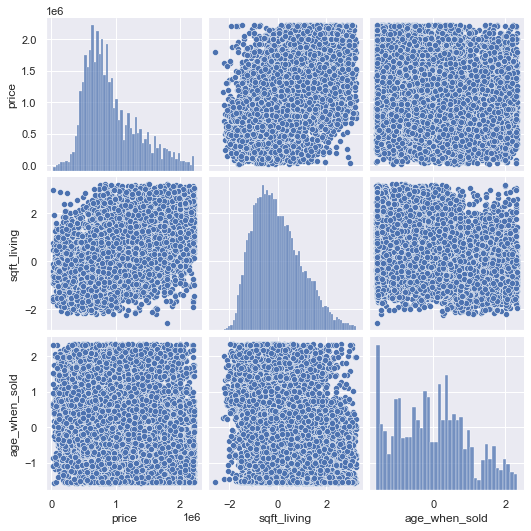

In [45]:
#pairplot with continuous variables
#commented out for run-time

sns.pairplot(df[['price', 'sqft_living', 'age_when_sold']])

In [24]:
'Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue', 
 Black Diamond, Bothell, Burien, Carnation, Clyde Hill, 
 Covington, Des Moines, Duvall, Enumclaw, Federal Way, 
 Hunts Point, Issaquah, Kenmore, Kent, Kirkland, 
 Lake Forest Park, Maple Valley, Medina, Mercer Island, Milton, 
 Newcastle, Normandy Park, North Bend, Pacific, Redmond, 
 Renton, Sammamish, SeaTac, Seattle, Shoreline, Skykomish, 
 Snoqualmie, Tukwila, Woodinville, Yarrow Point]

SyntaxError: invalid syntax (<ipython-input-24-73cd3a7b54b6>, line 1)